In [1]:
#Insurance Data
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [2]:
#Dataset
Dataset=pd.read_csv('/content/drive/MyDrive/Machine_Learning/Datasets/insurance.csv')
Dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
#Structure of the data
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Dimensions of the Data
Dataset.shape

(1338, 7)

In [5]:
Dataset['sex']=Dataset['sex'].astype('category')
Dataset['smoker']=Dataset['smoker'].astype('category')
Dataset['children']=Dataset['children'].astype('category')
Dataset['region']=Dataset['region'].astype('category')

In [6]:
#Info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


In [7]:
data_new=pd.get_dummies(Dataset, drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   expenses          1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


In [8]:
data_new

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,10600.55,1,0,0,1,0,0,0,1,0,0
1334,18,31.9,2205.98,0,0,0,0,0,0,0,0,0,0
1335,18,36.9,1629.83,0,0,0,0,0,0,0,0,1,0
1336,21,25.8,2007.95,0,0,0,0,0,0,0,0,0,1


In [9]:
data_new.head()

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.92,0,0,0,0,0,0,1,0,0,1
1,18,33.8,1725.55,1,1,0,0,0,0,0,0,1,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,0,1,0
3,33,22.7,21984.47,1,0,0,0,0,0,0,1,0,0
4,32,28.9,3866.86,1,0,0,0,0,0,0,1,0,0


In [10]:
#Training Data
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data_new, train_size = 0.70, test_size=0.30, random_state=100)

In [11]:
df_train

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,51,24.8,23967.38,1,0,1,0,0,0,1,1,0,0
522,51,33.9,9866.30,0,0,0,0,0,0,0,0,0,0
155,44,39.5,6948.70,1,0,0,0,0,0,0,1,0,0
671,29,31.2,3943.60,0,0,0,0,0,0,0,0,0,0
1173,38,29.3,6457.84,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,21,22.3,2103.08,1,1,0,0,0,0,0,0,0,1
53,36,34.4,37742.58,1,0,0,0,0,0,1,0,1,0
350,57,23.2,11830.61,0,0,0,0,0,0,0,1,0,0
79,41,33.0,6571.02,0,0,0,0,0,0,0,1,0,0


In [12]:
df_test

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
12,23,34.4,1826.84,1,0,0,0,0,0,0,0,0,1
306,28,27.5,20177.67,0,0,1,0,0,0,0,0,0,1
318,44,27.6,7421.19,0,0,0,0,0,0,0,1,0,0
815,20,31.5,1877.93,0,0,0,0,0,0,0,0,1,0
157,18,25.2,15518.18,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,18,35.2,1727.54,1,1,0,0,0,0,0,0,1,0
1005,29,31.7,4433.39,1,0,1,0,0,0,0,1,0,0
389,24,30.2,4618.08,0,0,0,1,0,0,0,1,0,0
923,34,35.8,4320.41,1,0,0,0,0,0,0,1,0,0


In [13]:
data_nums=df_train[['age', 'bmi', 'expenses']]
data_nums

,age,bmi,expenses
966,51,24.8,23967.38
522,51,33.9,9866.30
155,44,39.5,6948.70
671,29,31.2,3943.60
1173,38,29.3,6457.84
...,...,...,...
802,21,22.3,2103.08
53,36,34.4,37742.58
350,57,23.2,11830.61
79,41,33.0,6571.02


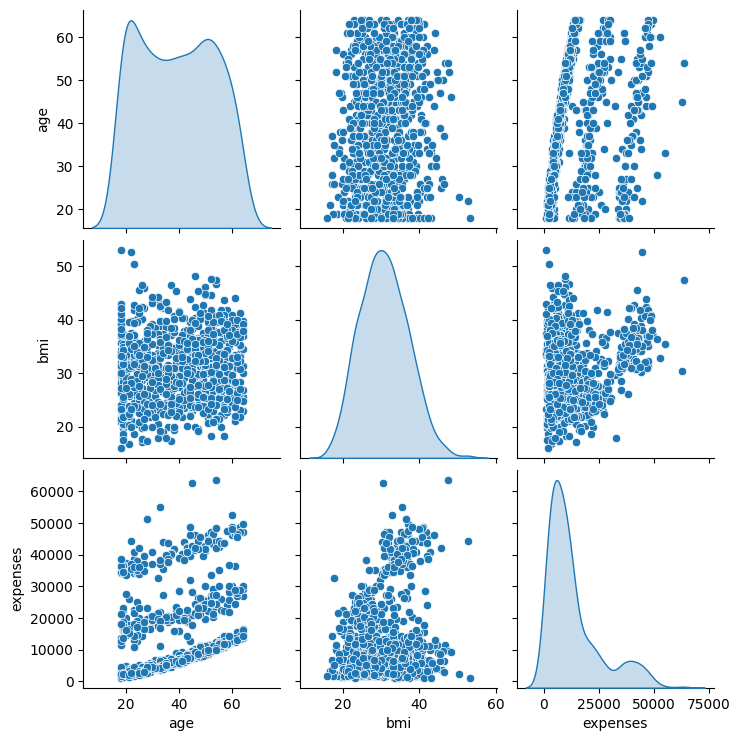

In [14]:
sb.pairplot(data_nums, diag_kind='kde')
plt.show()

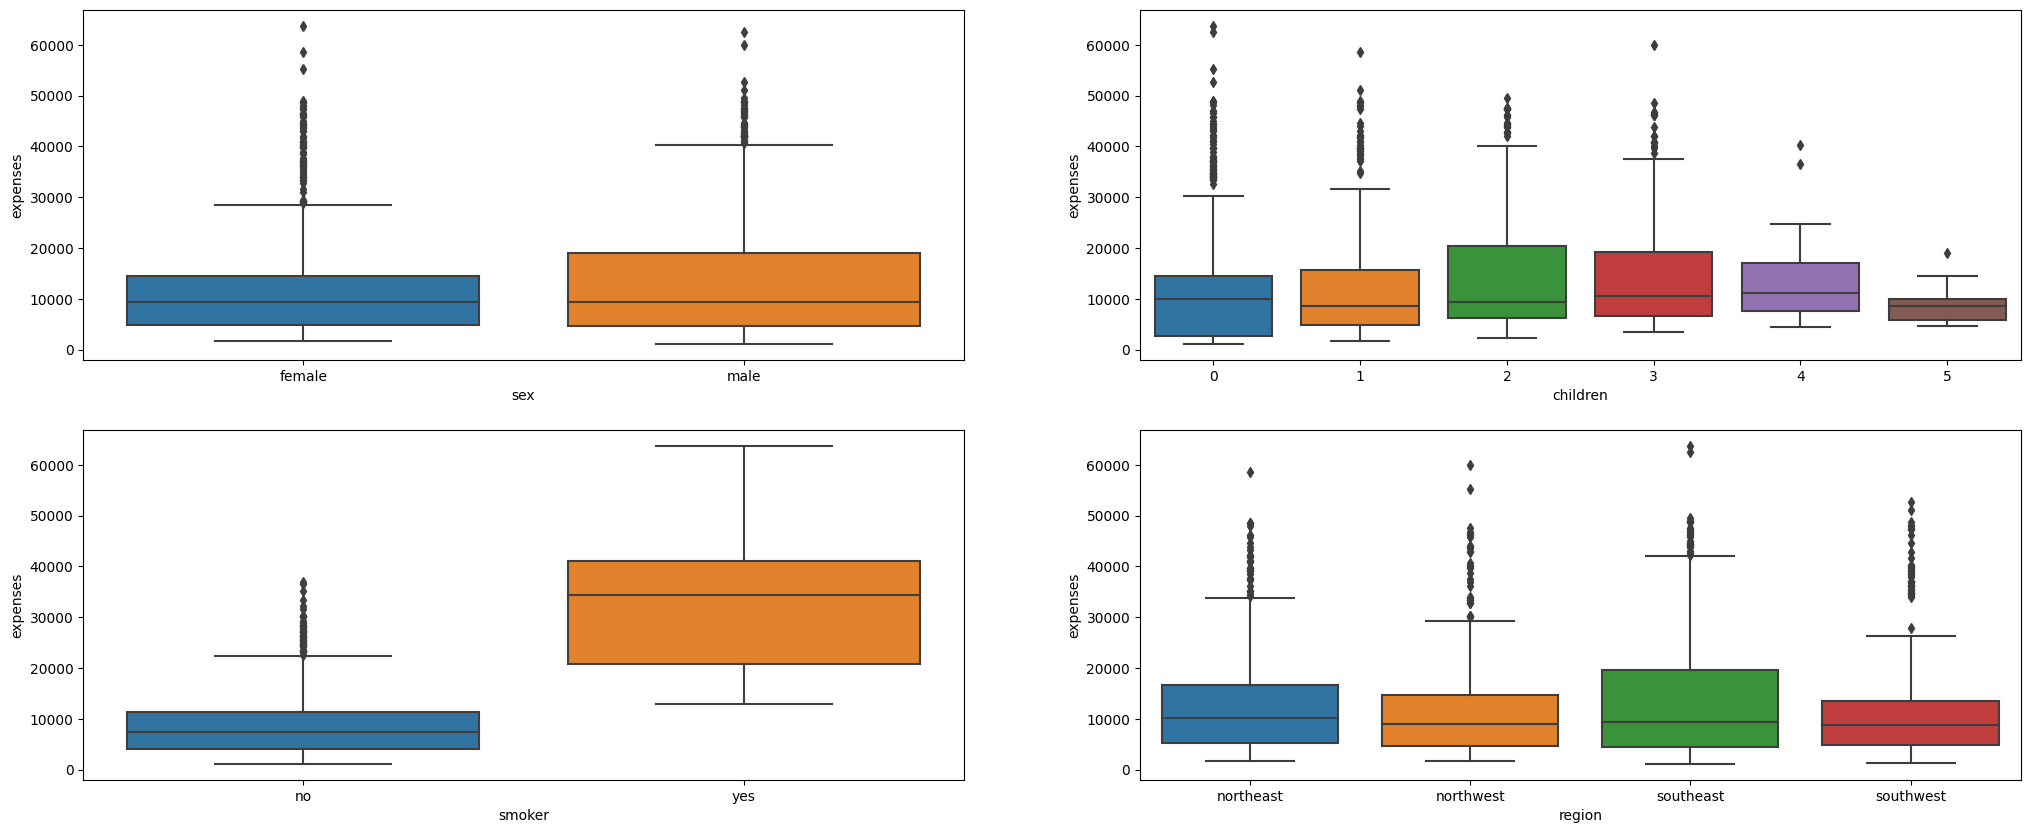

In [15]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 2, 1)
sb.boxplot(x='sex', y='expenses', data=Dataset)
plt.subplot(2, 2, 2)
sb.boxplot(x='children', y='expenses', data=Dataset)
plt.subplot(2, 2, 3)
sb.boxplot(x='smoker', y='expenses', data=Dataset)
plt.subplot(2, 2, 4)
sb.boxplot(x='region', y='expenses', data=Dataset)
plt.show()

<ipython-input-16-3f3c70947aa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(Dataset.corr(), annot=True, cmap="RdBu")


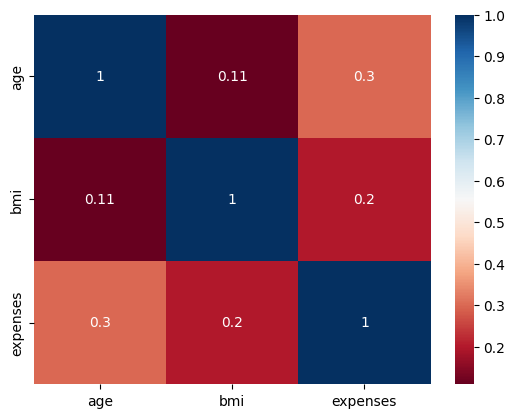

In [16]:
#Heat Map
sb.heatmap(Dataset.corr(), annot=True, cmap="RdBu")
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [18]:
df_train.head()

,age,bmi,expenses,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
966,51,24.8,23967.38,1,0,1,0,0,0,1,1,0,0
522,51,33.9,9866.30,0,0,0,0,0,0,0,0,0,0
155,44,39.5,6948.70,1,0,0,0,0,0,0,1,0,0
671,29,31.2,3943.60,0,0,0,0,0,0,0,0,0,0
1173,38,29.3,6457.84,1,0,1,0,0,0,0,1,0,0


In [19]:
num_vars=['age', 'bmi', 'expenses']
df_train[num_vars]=mms.fit_transform(df_train[num_vars])
df_train[num_vars]

,age,bmi,expenses
966,0.717391,0.237197,0.364661
522,0.717391,0.482480,0.139579
155,0.565217,0.633423,0.093008
671,0.239130,0.409704,0.045041
1173,0.434783,0.358491,0.085173
...,...,...,...
802,0.065217,0.169811,0.015662
53,0.391304,0.495957,0.584542
350,0.847826,0.194070,0.170934
79,0.500000,0.458221,0.086980


In [20]:
y_train=df_train.pop('expenses')
x_train=df_train
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
import statsmodels.api as sm
lrl=sm.OLS(y_train, x_train).fit()

In [23]:
lrl

In [24]:
lrl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              505.9
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:33:03   Log-Likelihood:                          834.83
No. Observations:                 936   AIC:                                     -1646.
Df Residuals:                     924   BIC:                                     -1588.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1818      0.010     17.836      0.000       0.162       0.202
bmi                  0.1401      0.017      8.193      0.000       0.107       0.174
sex_male            -0.0035      0.006     -0.556      0.579      -0.016       0.009
children_1          -0.0104      0.008     -1.273      0.203      -0.027       0.006
children_2           0.0202      0.009      2.251      0.025       0.003       0.038
children_3           0.0102      0.011      0.954      0.340      -0.011       0.031
children_4           0.0334      0.023      1.463      0.144      -0.011       0.078
children_5           0.0210      0.031      0.688      0.492      -0.039       0.081
smoker_yes           0.3798      0.008     46.011      0.000       0.364       0.396
region_northwest    -0.0224      0.009     -2.581      0.010      -0.039      -0.005
region_southeast    -0.0216      0.009     -2.347      0.019      -0.040      -0.004
region_southwest    -0.0345      0.009     -3.852      0.000      -0.052      -0.017
==============================================================================
Omnibus:                      225.970   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.624
Skew:                           1.277   Prob(JB):                    2.00e-119
Kurtosis:                       5.738   Cond. No.                         9.84
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""